In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**PREPROCESAMIENTO**

In [70]:
#Desde Drive
datos = pd.read_csv('/content/drive/Othercomputers/Mi portátil/2022/2024-1/Electivo Machine Learning - Deep Learning/Proyecto de asignatura/Datos/Modelos/DataOtonoInvierno.csv')

In [ ]:
# Cargar los datos desde pc
#datos = pd.read_csv('DataOtonoInvierno.csv')

In [71]:
datos

,Dia,Cantidad Cielo cubierto 12:00,Cantidad Cielo cubierto 18:00,Cantidad Cielo cubierto 00:00,Cantidad de cielo cubierto Media diaria,Humedad Relativa del aire 12:00,Humedad Relativa del aire 18:00,Humedad Relativa del aire 00:00,Humedad Relativa Del aire Media diaria,T. Minima,...,Viento predominante Fuerza,Presion QFE 12,Presion QFE 18,Presion QFE 00,Presion QFE Media diaria,Precipitación (12-18),Precipitación (18-00),Precipitación (00-06),Precipitación (06-12),Precipitación Diaria
0,1-4-2023,1.0,2.0,0.0,1.0,77.0,56.0,78.0,72.0,9.5,...,9.7,1014.4,1013.8,1013.9,1014.0,0.0,0.0,0.0,0.0,0.0
1,2-4-2023,7.0,6.0,1.0,4.7,97.0,72.0,71.0,84.2,13.0,...,7.7,1014.2,1014.7,1015.1,1014.7,0.0,0.0,0.0,0.0,0.0
2,3-4-2023,1.0,0.0,0.0,0.3,97.0,53.0,61.0,77.0,8.5,...,9.8,1015.0,1014.0,1013.8,1014.3,0.0,0.0,0.0,0.0,0.0
3,4-4-2023,0.0,1.0,3.0,1.3,81.0,43.0,81.0,71.5,6.9,...,6.2,1013.3,1009.2,1009.0,1010.5,0.0,0.0,0.0,0.0,0.0
4,5-4-2023,8.0,4.0,7.0,6.3,94.0,72.0,91.0,87.8,10.9,...,5.6,1012.9,1013.7,1015.1,1013.9,0.0,0.0,2.6,0.0,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9877,26-9-1970,1.0,1.0,0.0,0.7,NaN,NaN,NaN,NaN,5.1,...,10.9,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
9878,27-9-1970,0.0,6.0,4.0,3.3,NaN,NaN,NaN,NaN,0.6,...,11.4,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
9879,28-9-1970,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0,...,11.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
9880,29-9-1970,0.0,4.0,7.0,3.7,NaN,NaN,NaN,NaN,1.6,...,11.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.2,0.2


In [72]:
#Elimina filas con nulos
datos = datos.dropna().reset_index(drop=True)

In [73]:
# Convertir la columna de fecha a datetime y extrae características
datos['fecha'] = pd.to_datetime(datos['Dia'], format='%d-%m-%Y')
datos['año'] = datos['fecha'].dt.year
datos['mes'] = datos['fecha'].dt.month
datos['dia'] = datos['fecha'].dt.day

In [74]:
# Eliminar la columnas con caracteres no permitidos (-)
datos = datos.drop(columns=['fecha', 'Dia'])

In [75]:
#Transformamos la precipitacion a binario
datos['llovera'] = (datos['Precipitación Diaria'] > 0).astype(int)
datos = datos.drop(columns =['Precipitación Diaria'])

In [76]:
# Se dropean las variables con caracteres no permitidos (:) para (X) y se define la variable objetivo (y)
X = datos.drop(columns=['T.Minima Hora Local','T. maxima Hora Local', 'llovera'])
y = datos['llovera']

In [77]:
#Mas drops para dejar solo caracteristicas promedio de cada día
X = X.drop(columns=['Cantidad Cielo cubierto 12:00','Cantidad Cielo cubierto 18:00','Cantidad Cielo cubierto 00:00', 'Humedad Relativa del aire 12:00', 'Humedad Relativa del aire 18:00',
                    'Humedad Relativa del aire 00:00','Presion QFE 12','Presion QFE 18', 'Presion QFE 00', 'Precipitación (12-18)', 'Precipitación (18-00)', 'Precipitación (00-06)', 'Precipitación (06-12)'])

**SEPARACION** **DE** **DATOS**

In [78]:
# Dividir los datos en conjuntos de entrenamiento y prueba de manera normal
#Esto es para entrenar el modelo sin usar el escalado de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MODELO 1: Arból de Decisión

In [79]:
from sklearn import tree
from sklearn.tree import plot_tree


In [80]:
#Entrenamiento arbol de decision
model_tree = tree.DecisionTreeClassifier(random_state=42)
model_tree = model_tree.fit(X_train, y_train)

In [81]:
#Score basico arbol de decision
model_tree.score(X_test, y_test)

0.767601246105919

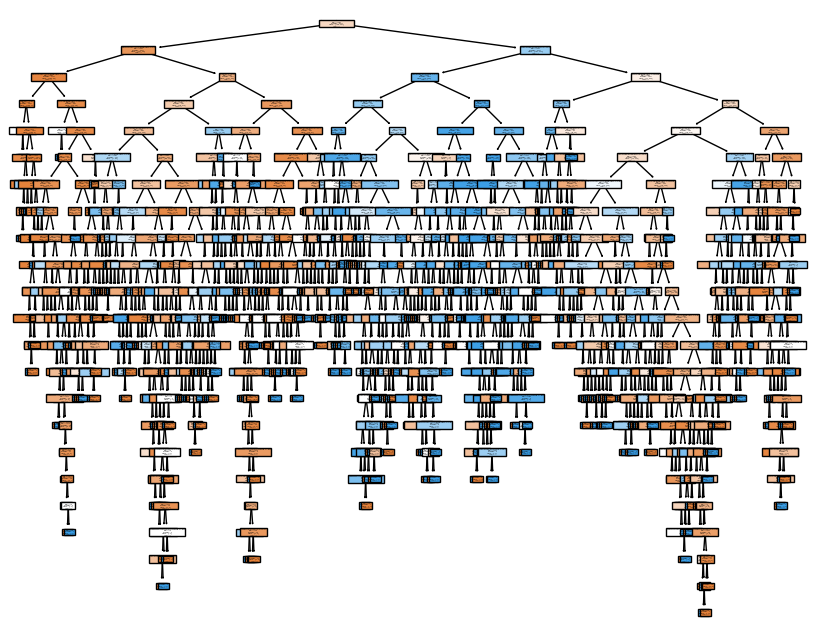

In [82]:
# Imprimir el árbol de decisión
plt.figure(figsize=(10, 8))
plot_tree(model_tree, feature_names=X.columns, class_names=list(map(str, y.unique())), filled=True)
plt.show()

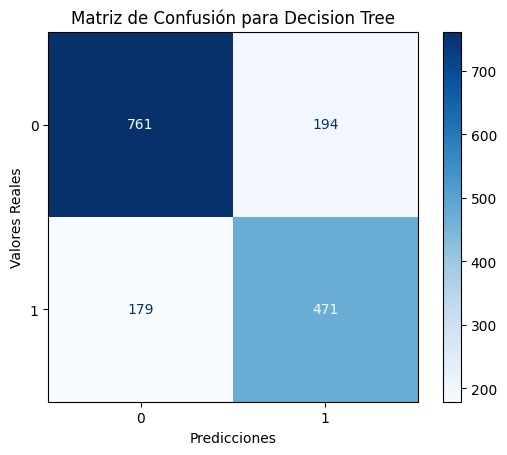

In [85]:
# Predecir las etiquetas para la matriz de confusión
y_pred = model_tree.predict(X_test)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)

# Visualizar la matriz de confusión
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión para Decision Tree")  # Agregar título
plt.xlabel("Predicciones")  # Cambiar label del eje x
plt.ylabel("Valores Reales")  # Cambiar label del eje y
plt.show()


MODELO 2: Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier


In [87]:
# Crear y entrenar el modelo
modelo_rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [88]:
#Score basico Random forest
modelo_rf_clf.score(X_test, y_test)

0.8292834890965732

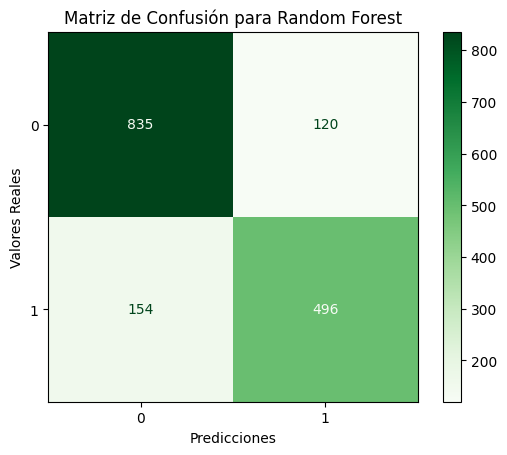

In [89]:
# Realizar predicciones
y_pred_rf_clf = modelo_rf_clf.predict(X_test)
# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf_clf)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
# Visualizar la matriz de confusión
cm_display.plot(cmap=plt.cm.Greens)
plt.title("Matriz de Confusión para Random Forest")  # Agregar título
plt.xlabel("Predicciones")  # Cambiar label del eje x
plt.ylabel("Valores Reales")  # Cambiar label del eje y
plt.show()

MODELO 3: Red Neuronal

In [90]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [91]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [92]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [93]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6574 - loss: 7.0142 - val_accuracy: 0.7121 - val_loss: 0.6887
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7024 - loss: 0.9646 - val_accuracy: 0.6841 - val_loss: 1.2262
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7171 - loss: 0.9545 - val_accuracy: 0.6972 - val_loss: 0.9973
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7587 - loss: 0.6759 - val_accuracy: 0.7657 - val_loss: 0.5634
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7330 - loss: 0.9572 - val_accuracy: 0.7988 - val_loss: 0.7198
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7528 - loss: 0.8047 - val_accuracy: 0.8081 - val_loss: 0.5057
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7507 - loss: 0.7798 - val_accuracy: 0.8000 - val_loss: 0.4574
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7623 - loss: 0.6738 - val_accuracy: 0.

In [94]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss:.3f}, Accuracy: {accuracy:.3f}')

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8006 - loss: 0.4942
Loss: 0.495, Accuracy: 0.796


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


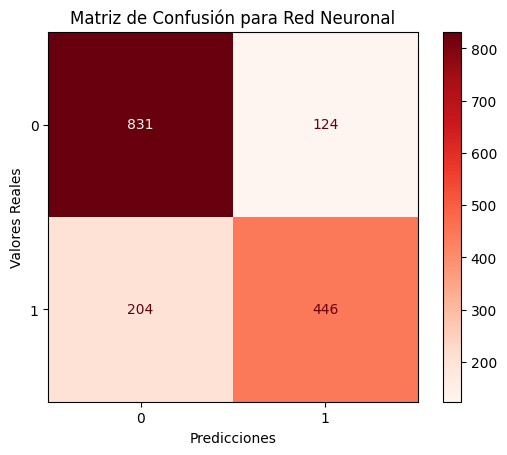

In [95]:
# Predicciones del modelo
y_predRedNeuronal = model.predict(X_test)
#Igualar las predicciones a numeros enteros 0 o 1
y_predRedNeuronal = (y_predRedNeuronal > 0.5).astype(int)
# Generar matriz de confusión
cm = confusion_matrix(y_test, y_predRedNeuronal)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
# Visualizar la matriz de confusión
cm_display.plot(cmap=plt.cm.Reds)
plt.title("Matriz de Confusión para Red Neuronal")  # Agregar título
plt.xlabel("Predicciones")  # Cambiar label del eje x
plt.ylabel("Valores Reales")  # Cambiar label del eje y
plt.show()